### Student Information
Name: 許人中

Student ID: M133010052

GitHub ID: JamesHsu1221

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [5]:
### Begin Assignment Here
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

## 1. The Data

### Dataset Summary

+ The dataset is a collection of  Youtube Comments and it was captured using the YouTube Data API. 
+ The data set consists of 1500 nostalgic and non-nostalgic comments in English.

### Languages

The language of the data is English.

### Citation
If you find this dataset usefull for your study, please cite the paper as followed:

```bibtex
@article{postalcioglu2020comparison,
  title={Comparison of Neural Network Models for Nostalgic Sentiment Analysis of YouTube Comments},
  author={Postalcioglu, Seda and Aktas, Senem},
  journal={Hittite Journal of Science and Engineering},
  volume={7},
  number={3},
  pages={215--221},
  year={2020},
  publisher={Hitit University}
}

---

## 2. Data Preparation
We can load this csv file online.

In [2]:
import pandas as pd

df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

or we can download it and load it in our folder

In [1]:
import pandas as pd

df = pd.read_csv('Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv')

Try to display some information about dataframe

In [2]:
print(len(df))

1500


In [3]:
df [0:5]

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...


In [4]:
df['comment'][0:5]

0    He was a singer with a golden voice that I lov...
1    The mist beautiful voice ever I listened to hi...
2    I have most of Mr. Reeves songs.  Always love ...
3    30 day leave from 1st tour in Viet Nam to conv...
4    listening to his songs reminds me of my mum wh...
Name: comment, dtype: object

In [5]:
df.sentiment[0:5]

0    not nostalgia
1        nostalgia
2        nostalgia
3    not nostalgia
4        nostalgia
Name: sentiment, dtype: object

Branch to new line according to '.'

In [59]:
print("\n".join(df.comment[0].split(".")))

He was a singer with a golden voice that I love to hear all the time
 I was his great fan at the age of 16years in those days and still now
 Although we have many singers now, but, I can vouch for Jim Reeves all the time
 You feel relaxed, emotional and loving
 Thank you Lord for his life



use 'for' function to print the comment

In [7]:
for t in df['comment'][:3]:
    print(t)

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel
I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is.


## 3. Data Transformation

### 3.1 Adding Columns

create new column `sentiment_number` to save `sentiment` in number

In [41]:
for t in range(len(df)):
    if df['sentiment'][t] == 'not nostalgia':
        df.at[t,'sentiment_number'] = 0
    elif df['sentiment'][t] == 'nostalgia':
        df.at[t,'sentiment_number'] = 1
df['sentiment_number'] = df['sentiment_number'].astype(int)

print(len(df.columns)) # checking how many columns we have

3


### 3.2 Familiarizing yourself with the Data

query the last 10 records

In [10]:
# a simple query
df[-10:][["comment","sentiment"]]

,comment,sentiment
1490,"He really isn't my cup of tea, but some of his...",not nostalgia
1491,real music...how i miss those days...brings ba...,nostalgia
1492,i used to cry over this song cause i had a boy...,nostalgia
1493,"He really has that ""love you like a brother"" l...",not nostalgia
1494,That's funny. But Leo really is a nice guy. He...,not nostalgia
1495,"i don't know!..but the opening of the video,.....",not nostalgia
1496,it's sad this is such a beautiful song when yo...,not nostalgia
1497,"Dear Friend, I think age and time is not that ...",not nostalgia
1498,I was born in 1954 and started to be aware of ...,nostalgia
1499,This is the first CD I bought after my marriag...,nostalgia


In [11]:
# using loc (by label)
df.loc[:10, 'comment']

0     He was a singer with a golden voice that I lov...
1     The mist beautiful voice ever I listened to hi...
2     I have most of Mr. Reeves songs.  Always love ...
3     30 day leave from 1st tour in Viet Nam to conv...
4     listening to his songs reminds me of my mum wh...
5     Every time I heard this song as a child, I use...
6     My dad loved listening to Jim Reeves, when I w...
7     i HAVE ALSO LISTENED TO Jim Reeves since child...
8              Wherever you  are you always in my heart
9     Elvis will always be number one no one can com...
10    ill bet if they begin to play this song on the...
Name: comment, dtype: object

In [12]:
# using iloc (by position)
df.iloc[:10, 1]

0    He was a singer with a golden voice that I lov...
1    The mist beautiful voice ever I listened to hi...
2    I have most of Mr. Reeves songs.  Always love ...
3    30 day leave from 1st tour in Viet Nam to conv...
4    listening to his songs reminds me of my mum wh...
5    Every time I heard this song as a child, I use...
6    My dad loved listening to Jim Reeves, when I w...
7    i HAVE ALSO LISTENED TO Jim Reeves since child...
8             Wherever you  are you always in my heart
9    Elvis will always be number one no one can com...
Name: comment, dtype: object

In [13]:
df[::10][:10]

,sentiment,comment,sentiment_number
0,not nostalgia,He was a singer with a golden voice that I lov...,0
10,not nostalgia,ill bet if they begin to play this song on the...,0
20,nostalgia,So many happy memories of the Jim reeves album...,1
30,nostalgia,remembering the good old days,1
40,nostalgia,My late mom's favorite when I was a young boy....,1
50,nostalgia,"If I remember correctly, this song came out af...",1
60,nostalgia,I have listened to Distant Drums since my tee...,1
70,nostalgia,Reminds me of my parents... in happy times..,1
80,not nostalgia,"Uhh man, music like this was alive back in the...",0
90,nostalgia,I remember listening to this classic song on K...,1


In [42]:
df.loc[lambda f:f.sentiment =='nostalgia'].iloc[0:10:2]

,sentiment,comment,sentiment_number
1,nostalgia,The mist beautiful voice ever I listened to hi...,1
4,nostalgia,listening to his songs reminds me of my mum wh...,1
6,nostalgia,"My dad loved listening to Jim Reeves, when I w...",1
11,nostalgia,this song came out my senior year in high scho...,1
13,nostalgia,I am 47 and grew up on songs of this type. I ...,1


## 4. Data Mining using Pandas

### 4.1 Missing Values

check missing values

In [15]:
df.isnull()

,sentiment,comment,sentiment_number
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1495,False,False,False
1496,False,False,False
1497,False,False,False
1498,False,False,False


use function to know how many missing value in every column

In [16]:
import helpers.data_mining_helpers as dmh

df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment,sentiment_number
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


adding missing value to original dataframe

In [53]:
# create missing value and combine with original dataframe
missing_value = [{'comment': '(missing value test)',
              }]

df_missing = pd.concat([df, pd.DataFrame(missing_value)], ignore_index=True)

len(df_missing)

1501

In [54]:
import helpers.data_mining_helpers as dmh

df_missing.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment,sentiment_number
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,1,0,1


delete the row if the dataframe have missing value

In [36]:
df_missing.dropna(inplace=True)

df_missing.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment,sentiment_number
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### 4.2 Dealing with Duplicate Data

detect how many rows are duplicate

In [25]:
sum(df.duplicated())

1

if we want to know which row is duplicated we can search like this

In [61]:
print(df[df.duplicated(keep=False)])

        sentiment                                            comment  \
62  not nostalgia  never heard this song before... WOW What an am...   
78  not nostalgia  never heard this song before... WOW What an am...   

    sentiment_number  
62                 0  
78                 0  


we can delete the duplicates row bu using `drop_duplicated`

In [64]:
df_delete_duplicated = df.drop_duplicates(keep='first', inplace=False) # keep the first comments and original dataframe

print(f"In the origianl dataframe, how many row's we have : {len(df)}")
print(f"After we delete the duplicated row, how many row's we have : {len(df_delete_duplicated)}")
print(f"After we delete the duplicated row, how many rows are duplicated : {sum(df_delete_duplicated.duplicated())}")

In the origianl dataframe, how many row's we have : 1500
After we delete the duplicated row, how many row's we have : 1499
After we delete the duplicated row, how many rows are duplicated : 0


We use `keep='first'`, because we want keep this comment and only delete the duplicated one.  
So only ruduce one row but not two rows.

## 5.  Data Preprocessing

### 5.1 Sampling

In [69]:
df_sample = df.sample(n=1000) #random state

len(df_sample)


1000

In [70]:
df_sample[0:20]

,sentiment,comment,sentiment_number
599,not nostalgia,Can anyone please Name me Some Legendary singe...,0
883,nostalgia,I fell in love with this song the summer of 19...,1
144,nostalgia,my wife's name was Laura she died an I miss he...,1
1407,nostalgia,this song was the back in the day man when it...,1
1249,nostalgia,This was our song I messed up and I'll live th...,1
578,nostalgia,Such a sweet voice. Wish female singers of tod...,1
259,not nostalgia,I know the song you're talking about. I'm sur...,0
855,nostalgia,As the memories come back while hearing this s...,1
851,nostalgia,I remember the words to this song like it was ...,1
1000,not nostalgia,Every time you hear their song....you get a fe...,0


use some plot to see the data distribution

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

sentiment
not nostalgia    750
nostalgia        750
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

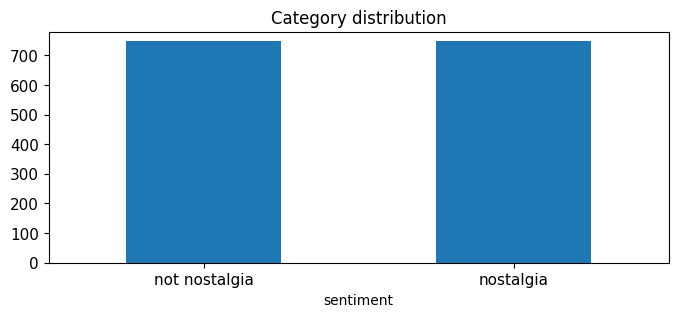

In [72]:
print(df.sentiment.value_counts())

# plot barchart for X
df.sentiment.value_counts().plot(kind = 'bar',
                                title = 'Category distribution',
                                ylim = [0,  max(df.sentiment.value_counts()+30)],        
                                rot = 0, fontsize = 11, figsize = (8,3))

compare about number of `df` and `df_sample`

sentiment
nostalgia        511
not nostalgia    489
Name: count, dtype: int64


Text(0.5, 0, '')

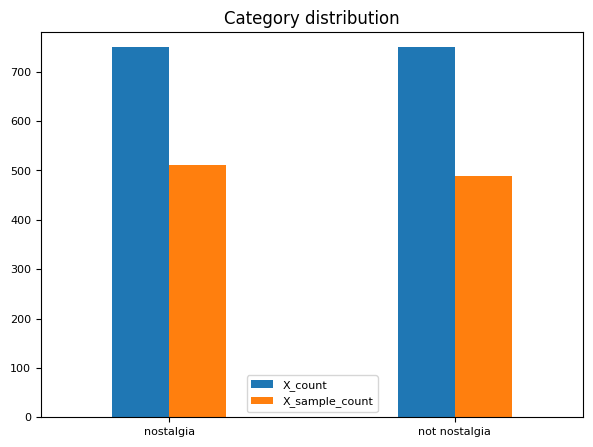

In [74]:
print(df_sample.sentiment.value_counts())

df_count = df.sentiment.value_counts()
df_sample_count = df_sample.sentiment.value_counts()

combine = pd.DataFrame({'X_count':df_count, 'X_sample_count':df_sample_count})
combine.plot(kind='bar', 
        title='Category distribution',
        ylim=[0, max(combine.max())+30], 
        width=0.4,
        rot=0, fontsize=8, figsize=(7,5))
plt.legend(prop={'size': 8})
plt.xlabel('')

### 5.2 Feature Creation

In [78]:
import nltk

# takes a like a minute or two to process
df['unigrams'] = df['comment'].apply(lambda x: dmh.tokenize_text(x))

print(df[0:5])

       sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4      nostalgia  listening to his songs reminds me of my mum wh...   

   sentiment_number                                           unigrams  
0                 0  [He, was, a, singer, with, a, golden, voice, t...  
1                 1  [The, mist, beautiful, voice, ever, I, listene...  
2                 1  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3                 0  [30, day, leave, from, 1st, tour, in, Viet, Na...  
4                 1  [listening, to, his, songs, reminds, me, of, m...  


Let's see what's in `unigrams`

In [82]:
list(df[0:1]['unigrams'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

### 5.3 Feature subset selection

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.comment) #learn the vocabulary and return document-term matrix
print(df_counts[0])

  (np.int32(0), np.int32(1598))	1
  (np.int32(0), np.int32(3570))	2
  (np.int32(0), np.int32(2973))	1
  (np.int32(0), np.int32(3650))	1
  (np.int32(0), np.int32(1470))	1
  (np.int32(0), np.int32(3534))	1
  (np.int32(0), np.int32(3282))	1
  (np.int32(0), np.int32(2028))	1
  (np.int32(0), np.int32(3336))	1
  (np.int32(0), np.int32(1606))	1
  (np.int32(0), np.int32(233))	2
  (np.int32(0), np.int32(3284))	3
  (np.int32(0), np.int32(3328))	2
  (np.int32(0), np.int32(1651))	2
  (np.int32(0), np.int32(1512))	1
  (np.int32(0), np.int32(1249))	1
  (np.int32(0), np.int32(323))	1
  (np.int32(0), np.int32(214))	1
  (np.int32(0), np.int32(2341))	1
  (np.int32(0), np.int32(15))	1
  (np.int32(0), np.int32(1733))	1
  (np.int32(0), np.int32(3304))	1
  (np.int32(0), np.int32(907))	1
  (np.int32(0), np.int32(258))	2
  (np.int32(0), np.int32(3124))	1
  (np.int32(0), np.int32(2328))	2
  (np.int32(0), np.int32(245))	1
  (np.int32(0), np.int32(3581))	1
  (np.int32(0), np.int32(1591))	1
  (np.int32(0), np.int

we can see what's the word in the index

In [85]:
count_vect.get_feature_names_out()[1598]

'he'

use `analyzer` to filt some common words

In [92]:
analyze = count_vect.build_analyzer()

print(f"Before analyze : {df.loc[0,'unigrams']}")
print(f"After  analyze : {analyze(df.loc[0,'comment'])}")

Before analyze : ['He', 'was', 'a', 'singer', 'with', 'a', 'golden', 'voice', 'that', 'I', 'love', 'to', 'hear', 'all', 'the', 'time', '.', 'I', 'was', 'his', 'great', 'fan', 'at', 'the', 'age', 'of', '16years', 'in', 'those', 'days', 'and', 'still', 'now', '.', 'Although', 'we', 'have', 'many', 'singers', 'now', ',', 'but', ',', 'I', 'can', 'vouch', 'for', 'Jim', 'Reeves', 'all', 'the', 'time', '.', 'You', 'feel', 'relaxed', ',', 'emotional', 'and', 'loving', '.', 'Thank', 'you', 'Lord', 'for', 'his', 'life', '.']
After  analyze : ['he', 'was', 'singer', 'with', 'golden', 'voice', 'that', 'love', 'to', 'hear', 'all', 'the', 'time', 'was', 'his', 'great', 'fan', 'at', 'the', 'age', 'of', '16years', 'in', 'those', 'days', 'and', 'still', 'now', 'although', 'we', 'have', 'many', 'singers', 'now', 'but', 'can', 'vouch', 'for', 'jim', 'reeves', 'all', 'the', 'time', 'you', 'feel', 'relaxed', 'emotional', 'and', 'loving', 'thank', 'you', 'lord', 'for', 'his', 'life']


Now let us look at the term-document matrix we built above.

In [93]:
df_counts.shape

(1500, 3730)

In [94]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [96]:
# we convert from sparse array to normal array
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

display word frequency with **heatmap**

In [107]:
# first twenty features only
plot_x = [str(i) for i in count_vect.get_feature_names_out()[0:30]]

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:30]]

# df_counts[how many documents, how many terms]
plot_z = df_counts[0:30, 0:30].toarray()

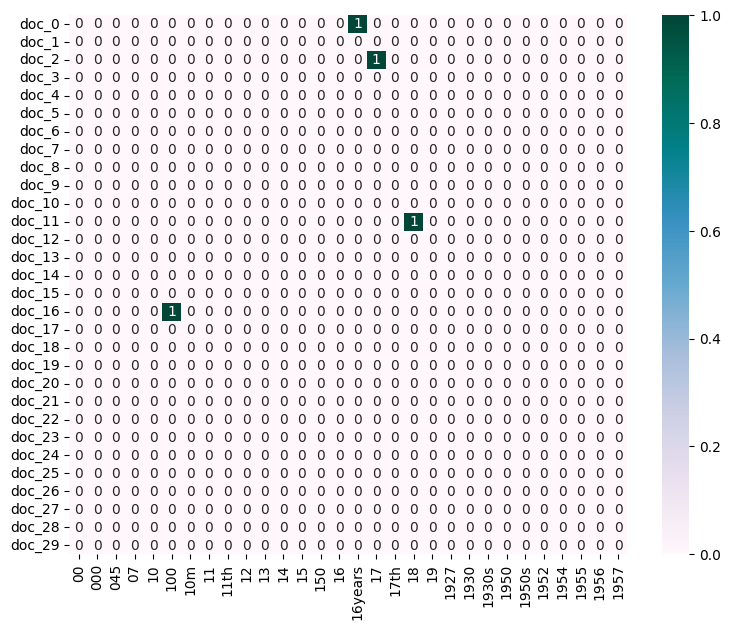

In [113]:
import seaborn as sns

df_heatmap = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_heatmap,
                 cmap="PuBuGn",
                 vmin=0, vmax=1, annot=True)

Search high frequency words in documents 0~30 and show on heatmap

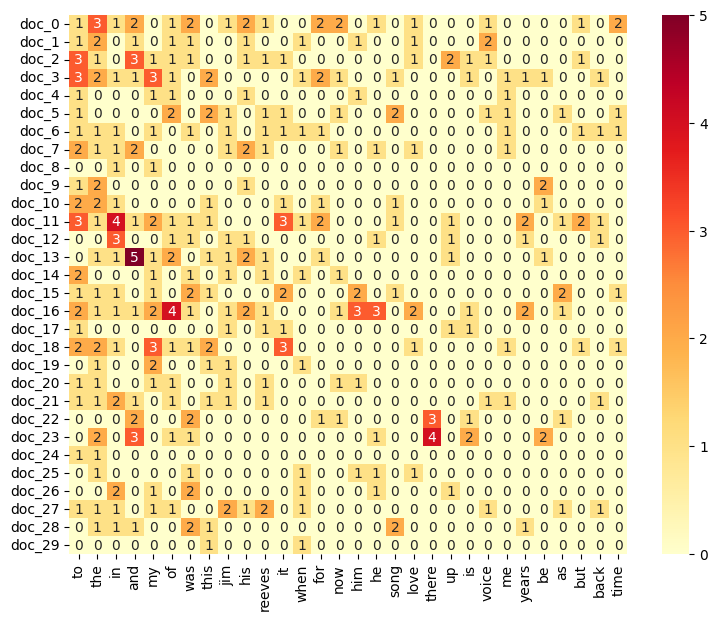

In [110]:
import numpy as np

hw_plot_y = ["doc_"+ str(i) for i in list(df.index)[0:30]] #doc 0~29
word_freq = np.array(df_counts[0:30, :].sum(axis=0)).flatten() #Find the vocabulary appear frequency in doc 0~29.
top_30_indices = np.argpartition(word_freq, -30)[-30:] #find the top 20 vocabulary's indice
high_to_low = top_30_indices[::-1]
hw_plot_z = df_counts[0:30, high_to_low].toarray() #make the form
hw_plot_x = count_vect.get_feature_names_out()[high_to_low] #change indice in the text 
Q11_df = pd.DataFrame(hw_plot_z, columns = hw_plot_x, index = hw_plot_y) #combine all the info
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(Q11_df,
                 cmap="YlOrRd",
                 vmin=0, vmax=np.max(hw_plot_z), annot=True)

### 5.4 Attribute Transformation / Aggregation